In [3]:
!pip install matplotlib
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To display plots inline
%matplotlib inline



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
data = pd.read_csv("train.csv")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()
data.describe()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Fill missing Age values 
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop('Cabin', axis=1, inplace=True)


C:\Users\SADDALA HARSHITHA\AppData\Local\Temp\ipykernel_11304\2657144901.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
C:\Users\SADDALA HARSHITHA\AppData\Local\Temp\ipykernel_11304\2657144901.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

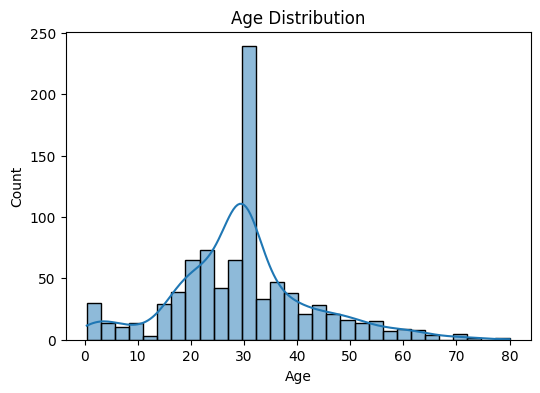

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


In [ ]:
#observation Age Distribution (Histogram) :
#Most passengers are between 20 to 40 years old.

#The distribution is slightly right-skewed, meaning there are fewer older passengers.

#There are some children (under 10 years) and elderly passengers (above 60), but they are fewer in number.

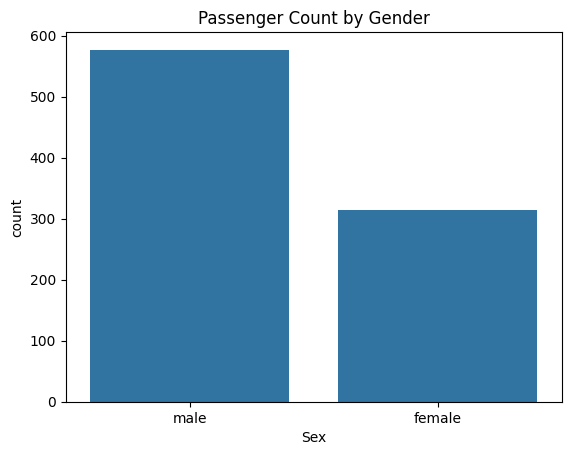

In [8]:
sns.countplot(x='Sex', data=data)
plt.title('Passenger Count by Gender')
plt.show()


In [ ]:
#Observation Passenger Count by Gender:

#The number of male passengers is much higher than females.

#This imbalance is important to consider when analyzing survival rates.

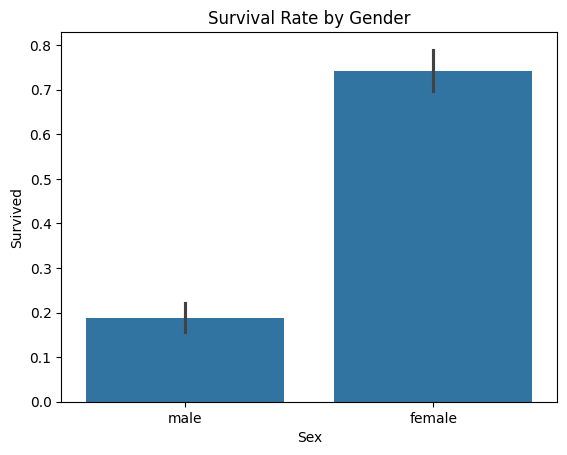

In [9]:
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.show()


In [ ]:
#Observation Survival Rate by Gender:

#Females had a much higher survival rate than males.

#This aligns with the Titanic’s “women and children first” evacuation policy.

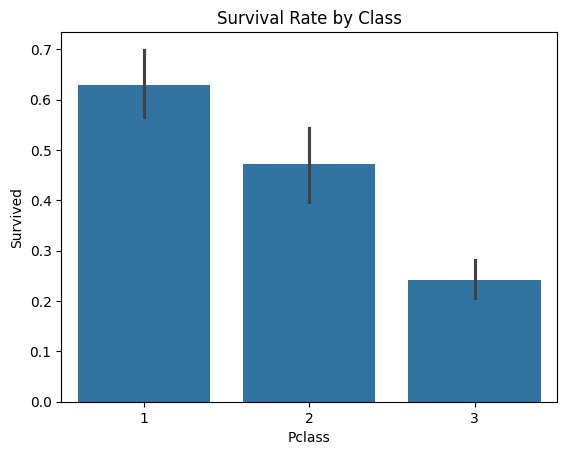

In [10]:
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Class')
plt.show()


In [ ]:
#Observation Survival Rate by Class :

#1st class passengers had the highest survival rate.

#3rd class passengers had the lowest chances of survival.

#This indicates that survival was influenced by socioeconomic status.

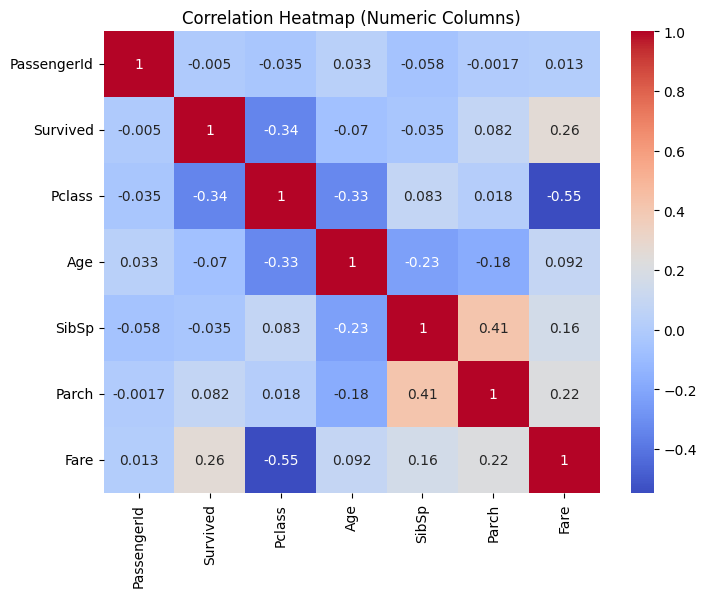

In [12]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])

#  correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Columns)')
plt.show()



In [ ]:
#Observation Correlation Heatmap:

#Fare and Pclass show a negative correlation — higher class means lower fare number.

#Survived has a positive correlation with Fare — passengers who paid higher fares were more likely to survive.

#Age shows a weak correlation with survival, meaning age alone didn’t strongly affect the outcome.

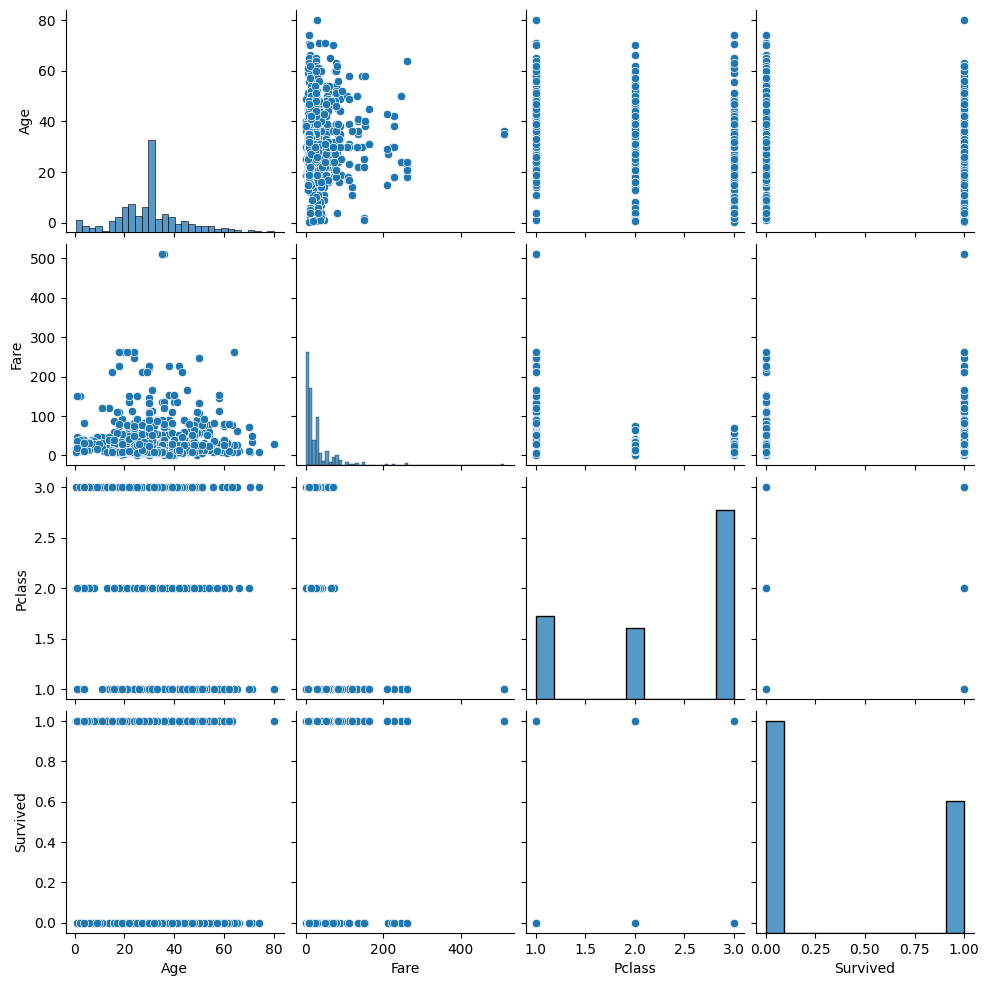

In [13]:
sns.pairplot(data[['Age', 'Fare', 'Pclass', 'Survived']])
plt.show()


In [ ]:
#Observation Pairplot:

#Passengers with higher fares and lower class numbers (1st class) show higher survival.

#Age doesn’t show a very clear pattern with survival, but young passengers seem slightly more likely to survive.

In [ ]:
#Summary:

#Majority of passengers were male.

#Most passengers were in 3rd class.

#Females and passengers in higher classes had better survival rates.

#Fare and Class had a strong relationship with survival.

#Age had a slight impact; younger passengers tended to survive more.